In [2]:
from audiodataset import AudioDataset, TestDataset
from config import Config
from torch.utils.data import Dataset, DataLoader, RandomSampler
import random

cfg = Config()

def sampler(dataset):
    indices = []
    for i in range(len(dataset)):
        if dataset[i][2]>=8:
            repeat_value = int(dataset[i][2]//12)+2
            
            indic_nums = [i]*repeat_value
            indices.extend(indic_nums)
        else:
            indices.append(i)
    # 인덱스를 무작위로 섞기
    random.shuffle(indices)
    return iter(indices)

In [4]:
audio_dataset = AudioDataset(cfg, data_path="../csv_files/train_combined_csv.csv", train=True) 
audio_dataloader = DataLoader(audio_dataset, batch_size=4, shuffle=True, num_workers=12)

In [3]:
w1, _, _ = audio_dataset[123]

print(w1.shape)


torch.Size([1, 48000])


In [4]:
import torch

def normalize(audio):
    audio = audio/(audio.max(1)[0].abs().unsqueeze(1) + torch.finfo(torch.float32).eps)
    
    rms = (audio**2).mean(1).pow(0.5)
    scalar = 10**(-25/20) / (rms+torch.finfo(torch.float32).eps)
    audio = audio * scalar.unsqueeze(1)

    return audio


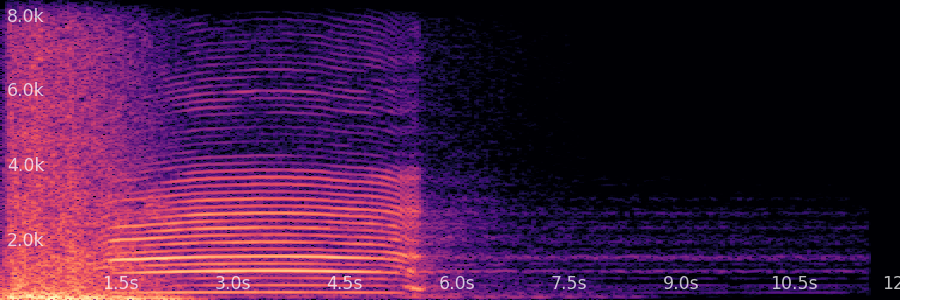
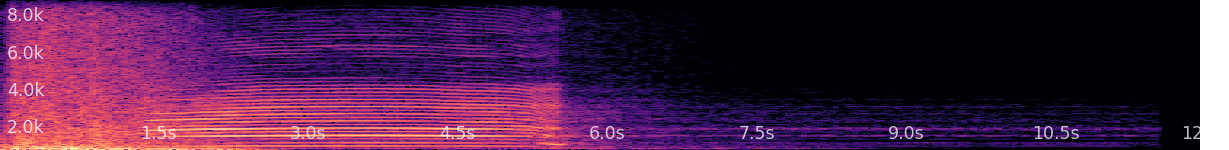

In [5]:
from audiotools import AudioSignal

AudioSignal(w1, sample_rate=16000).widget()
# AudioSignal(w2, sample_rate=16000).widget()

# w11 = normalize(w2)
# w12 = normalize(w2)

# AudioSignal(w11, sample_rate=16000).widget()
# AudioSignal(w12, sample_rate=16000).widget()

In [ ]:
AudioSignal(w22[0][0], sample_rate=16000).widget()


In [ ]:
AudioSignal(w1, sample_rate=16000).widget()
rms = (w1**2).mean(1).pow(0.5)
print(rms)
scalar = 10**(-25/20) / (rms+torch.finfo(torch.float32).eps)
w12 = w1 * scalar.unsqueeze(1)
AudioSignal(w12, sample_rate=16000).widget()

print((w12**2).mean(1).pow(0.5))


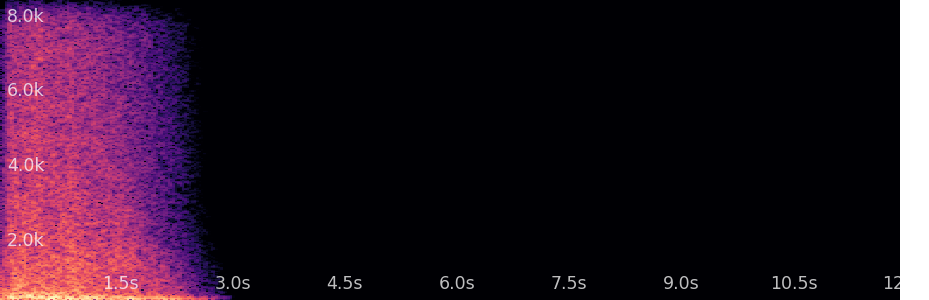
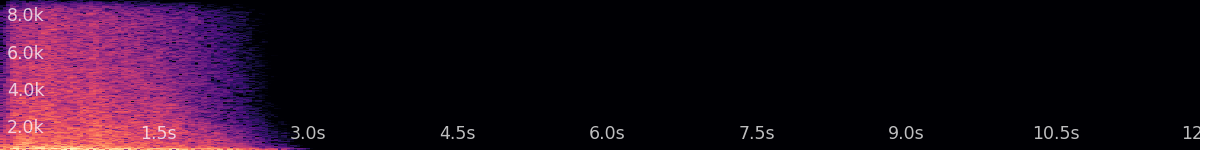

tensor([0.1043])



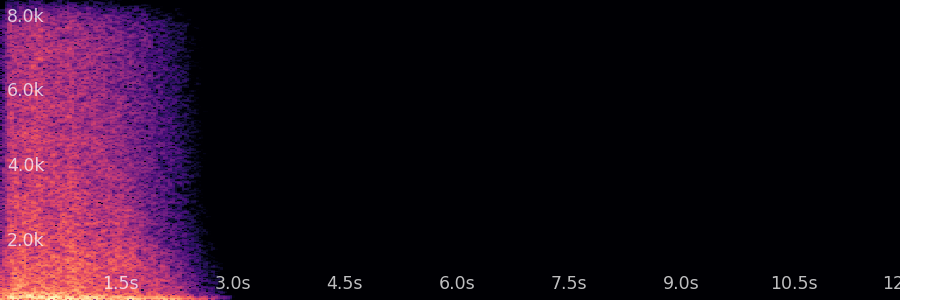
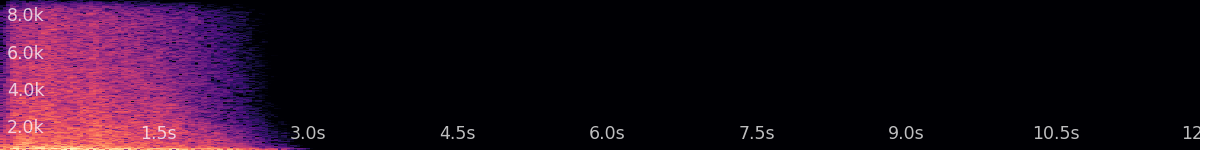

tensor([0.0562])


In [47]:
AudioSignal(w2, sample_rate=16000).widget()
rms = (w2**2).mean(1).pow(0.5)
print(rms)
scalar = 10**(-25/20) / (rms+torch.finfo(torch.float32).eps)
w22 = w2 * scalar.unsqueeze(1)
AudioSignal(w22, sample_rate=16000).widget()
print((w22**2).mean(1).pow(0.5))

In [10]:
rms = (w1**2).mean(1).pow(0.5)

scalar = 10**(-25/20) / (rms+torch.finfo(torch.float32).eps)

scalar

w1 = w1 * scalar.unsqueeze(1)



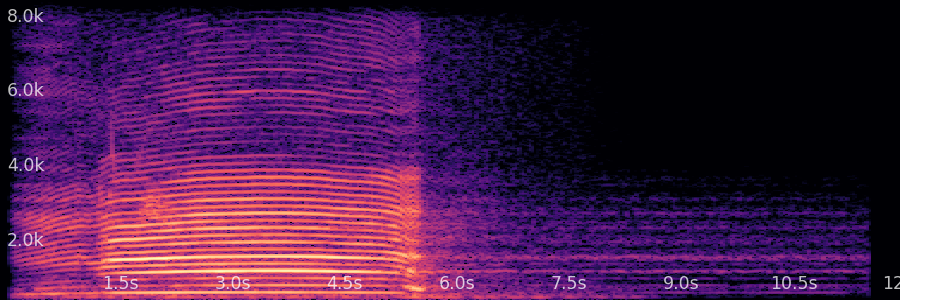
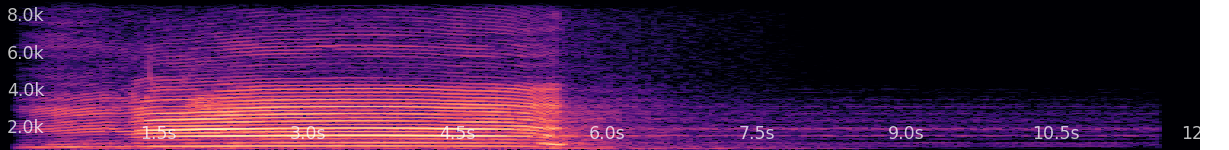


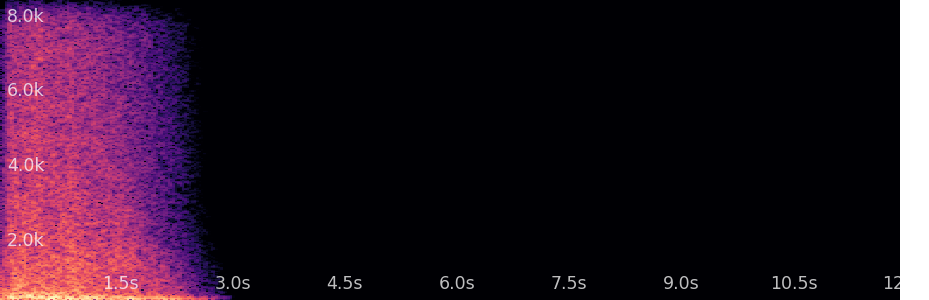
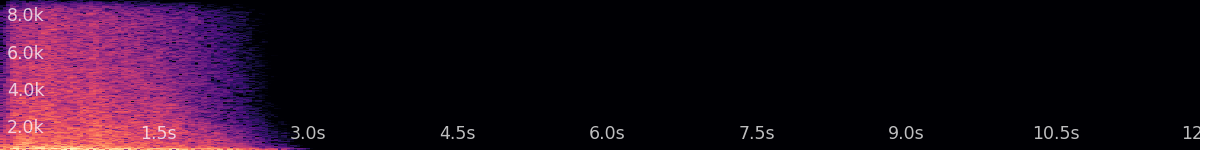


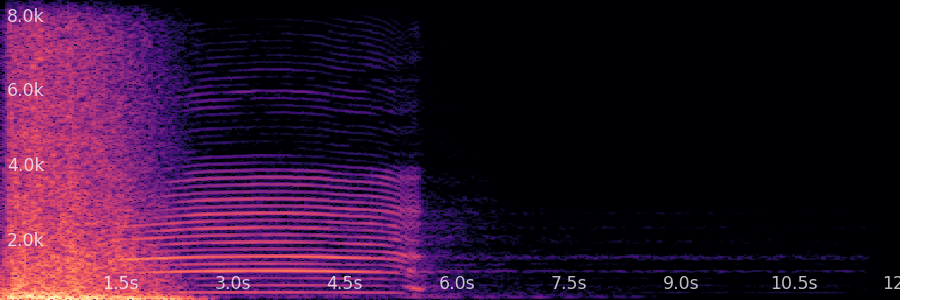
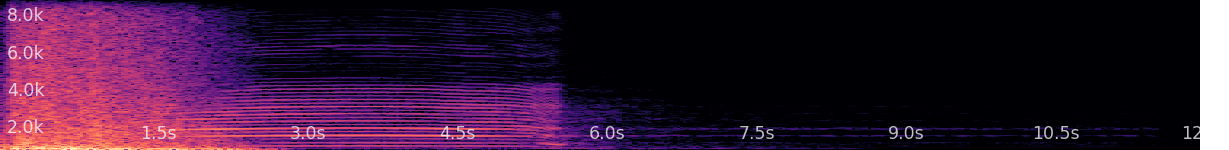

In [11]:
from audiotools import AudioSignal

AudioSignal(w1, sample_rate=16000).widget()
AudioSignal(w2, sample_rate=16000).widget()
AudioSignal(w3, sample_rate=16000).widget()

In [17]:
# Read from csv file
import pandas as pd
from tqdm import tqdm

datas = []
od = pd.read_csv("../csv_files/dummy_test.csv")
for i in tqdm(range(len(od))):
    row = od.iloc[i]
    datas.append({
        "audio_path":row['audio_path'],
        "caption":row['caption'],
        "duration":row['duration']
    })

under_3seconds = [d for d in datas if d['duration']<=3]

print("전체 사운드 개수 : ", len(datas))
print("3초 이하 사운드 개수 : ", len(under_3seconds))

def mix_caption(caption1, caption2):
    return ""

100%|██████████| 99/99 [00:00<00:00, 13512.40it/s]

전체 사운드 개수 :  99
3초 이하 사운드 개수 :  65


In [18]:
# 우선 모든 오디오 파일 경로, caption을 담고 있다고 가정하고 시작한다.
import random

rows = []
# 여기선 그냥 정보만 저장. 실제로 합쳐서 쓰는건 DataLoader 단에서
for idx, data in enumerate(under_3seconds):
    random_idx = idx
    while random_idx == idx:
        random_idx = random.randint(0, len(under_3seconds)-1)

    added_audio_path = under_3seconds[random_idx]["audio_path"]
    added_caption = under_3seconds[random_idx]["caption"]
    mixed_caption = mix_caption(data["caption"], added_caption)

    row = [
        data["audio_path"],
        data["caption"],
        data["duration"],
        added_audio_path,
        added_caption,
        mixed_caption
    ]

    rows.append(row)

first_row = [["audio_path", "caption", "duration", "added_audio_path", "added_caption", "mixed_caption"]]
rows_for_save = first_row+rows

import csv
# Write to CSV file
with open('mixed_under3s.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerows(rows_for_save)